In [1]:
#pip install stop_words

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'stop_words'

In [5]:
df=pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Droping the unneccerary columns and remaining
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

df.columns=['Class','Text']

df['Label']=df.Class.map({'ham':0, 'spam':1})
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
df.groupby('Class').describe(include="O")

Text                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

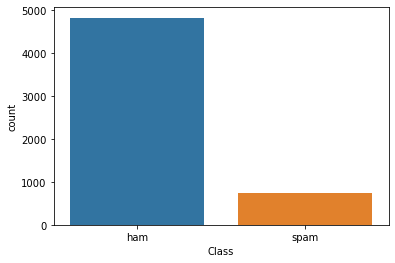

In [8]:
sns.countplot(data=df,x='Class');

In [9]:
Ham_texts=df.query("Class=='ham'")['Text']
Spam_texts=df.query("Class=='spam'")['Text']

In [10]:
Ham_texts

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 4825, dtype: object

In [11]:
def words_cleaner(data):
    words=[re.sub('[^a-zA-Z]', ' ',i) for i in df['Text']]
    words=[i.lower() for j in data for i in j.split()] ### splitting all the sentences into words
    words=[i for i in words if not i in set(stopwords.words('english'))]### removing stopwords
    words=[i for i in words if len(i)>2]## removing words with less than two characters
    return words
    

In [12]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor, max_words=100)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [14]:
ham_words = words_cleaner(Ham_texts)   #cleaning using the function we created
ham_words_freq=nltk.FreqDist(ham_words)
ham_words_freq=pd.DataFrame(ham_words_freq.most_common(10), 
                            columns=['Top_Words', 'Frequency'])

In [15]:
ham_words_freq

,Top_Words,Frequency
0,i'm,369
1,get,293
2,&lt;#&gt;,276
3,got,227
4,like,221
5,call,215
6,come,215
7,know,208
8,good,187
9,i'll,167


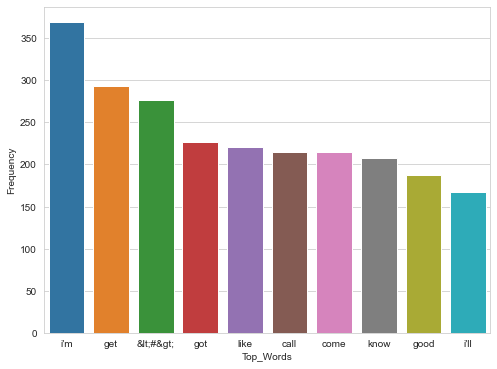

In [16]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
ax=sns.barplot(x='Top_Words', y='Frequency', data=ham_words_freq)

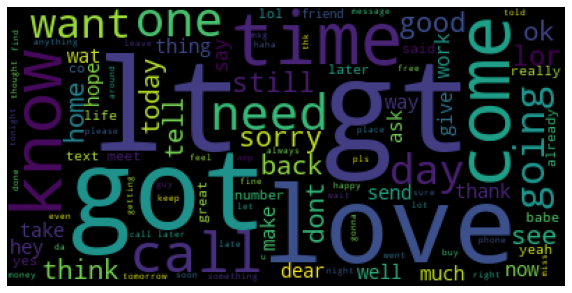

In [17]:
wc(ham_words, 'black')

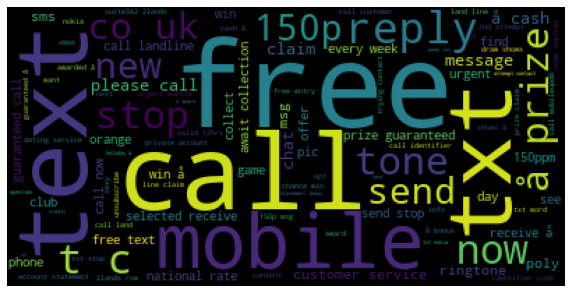

In [18]:
wc(words_cleaner(Spam_texts), 'black')

In [19]:
def features_cleaner(data):
    clean_txt=[]
    for i in range(0, len(data)):
        text=re.sub('[^a-zA-Z]', ' ', data[i])
        text=text.lower()
        text=text.split()
        ps=PorterStemmer()
        text=[ps.stem(j) for j in text if not j in set(stopwords.words('english'))]
        text=''.join(text)
        clean_txt.append(text)
    return clean_txt

In [20]:
X=features_cleaner(df['Text'])
y=df['Label']

In [21]:
for i in range(0,3):
    print(df['Text'][i])
print('******************************** After Cleaning ********************************')
for i in range(0,3):
    print(X[i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
******************************** After Cleaning ********************************
gojurongpointcraziavailbugingreatworldlaebuffetcinegotamorwat
oklarjokewifuoni
freeentriwklicompwinfacupfinaltktstmaytextfareceiventriquestionstdtxtratecappli


In [22]:
cv = CountVectorizer()
X=cv.fit_transform(X)
X_train, X_test,y_train,y_test=train_test_split
(X,y,test_size=0.25,random_state=50)

In [23]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [24]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[1193,    0],
       [ 196,    4]], dtype=int64)

<AxesSubplot:>

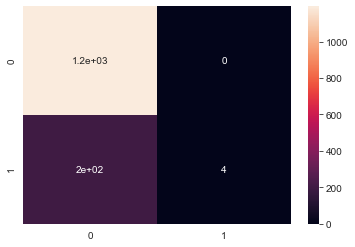

In [25]:
sns.heatmap(cf_matrix,annot=True)

In [26]:
accuracy_score(y_pred,y_test)

0.8592964824120602

In [27]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [28]:
r.fit(X_train,y_train)
y_pred=r.predict(X_test)

In [29]:
r_matrix=confusion_matrix(y_test,y_pred)
r_matrix

array([[1193,    0],
       [ 139,   61]], dtype=int64)

<AxesSubplot:>

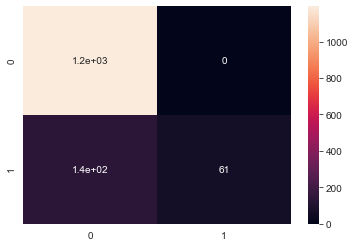

In [30]:
sns.heatmap(r_matrix,annot=True)

In [31]:
d.fit(X_train, y_train)
y_pred=d.predict(X_test)

In [32]:
d_matrix=confusion_matrix(y_test,y_pred)
d_matrix

array([[1193,    0],
       [ 139,   61]], dtype=int64)